
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [1]:
student_number = '400107553'
first_name = 'Amirali'
last_name = 'Pourdehghan'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [2]:
# TODO: Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [3]:
# TODO: Write your code here
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['spotify.csv']))
# Example: retain only 'track_name' and other relevant features
features = ['track_name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
data = data[features]
data.head()

Saving spotify.csv to spotify.csv


,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,I Don't Care (with Justin Bieber) - Loud Luxur...,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036
1,Memories - Dillon Francis Remix,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972
2,All the Time - Don Diablo Remix,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008
3,Call You Mine - Keanu Silva Remix,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956
4,Someone You Loved - Future Humans Remix,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [4]:
# TODO: Write your code here
def standard_scaler(data):
    return (data - data.mean()) / data.std()

# Extract features for scaling (excluding 'track_name')
feature_data = data.drop('track_name', axis=1)

# Apply standard scaler
scaled_data = standard_scaler(feature_data)

# Importance of Standard Scaler:
# Standardizing the data (mean = 0 and variance = 1) is important in clustering algorithms like K-means because it ensures that each feature contributes equally to the distance calculations. If the data is not standardized, features with larger scales can dominate the distance measurement, leading to biased clusters.


# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

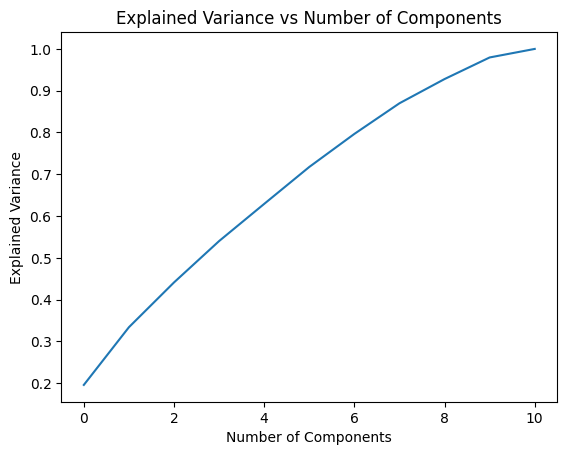

Number of components to retain: 9


In [5]:
# TODO: Write your code here
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Determine number of components to retain based on explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()

# Retain components where cumulative explained variance >= 90%
num_components = np.argmax(explained_variance >= 0.9) + 1
pca = PCA(n_components=num_components)
pca_data = pca.fit_transform(scaled_data)
print("Number of components to retain:", num_components)

# Clustering

Implement K-means for clustering from scratch.

In [6]:
# TODO: Write your code here
class KMeansScratch:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, data):
        # Randomly initialize cluster centers
        np.random.seed(42)
        self.centers = data[np.random.choice(data.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iter):
            # Assign clusters
            self.labels = self._assign_clusters(data)
            # Update centers
            new_centers = self._update_centers(data)
            # Check for convergence
            if np.all(self.centers == new_centers):
                break
            self.centers = new_centers

    def _assign_clusters(self, data):
        distances = np.linalg.norm(data[:, np.newaxis] - self.centers, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centers(self, data):
        return np.array([data[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])

    def predict(self, data):
        return self._assign_clusters(data)


Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

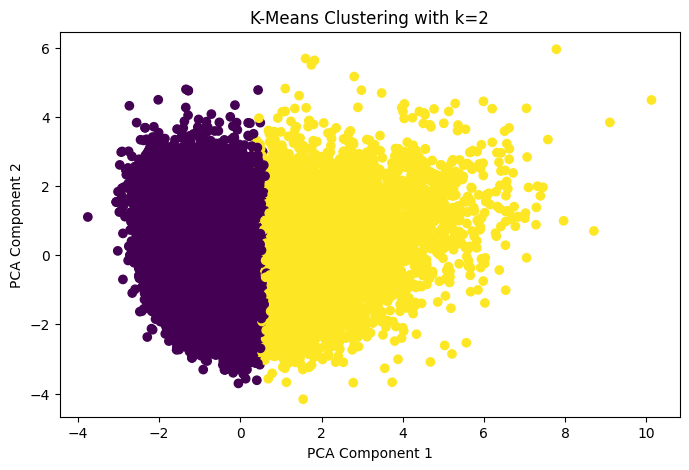

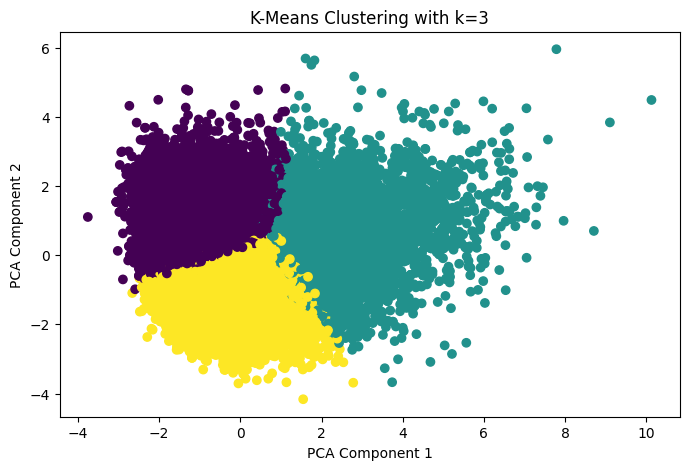

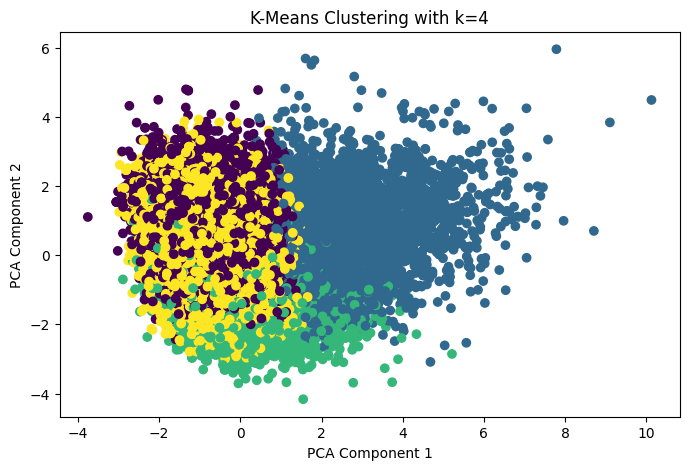

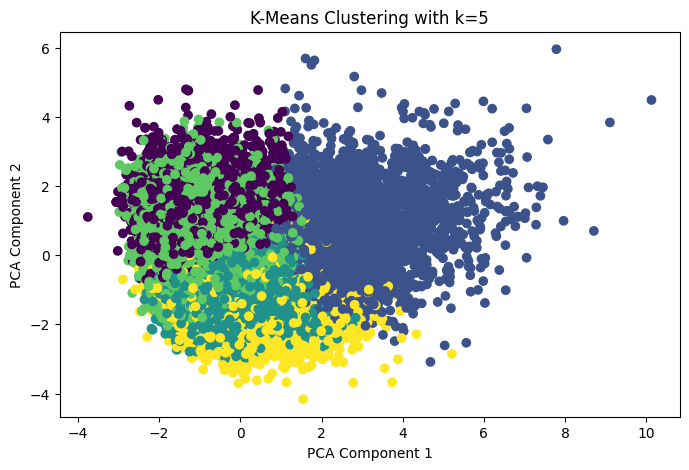

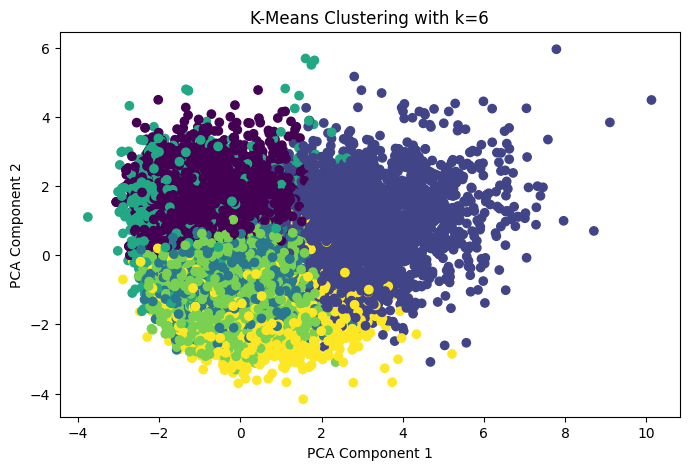

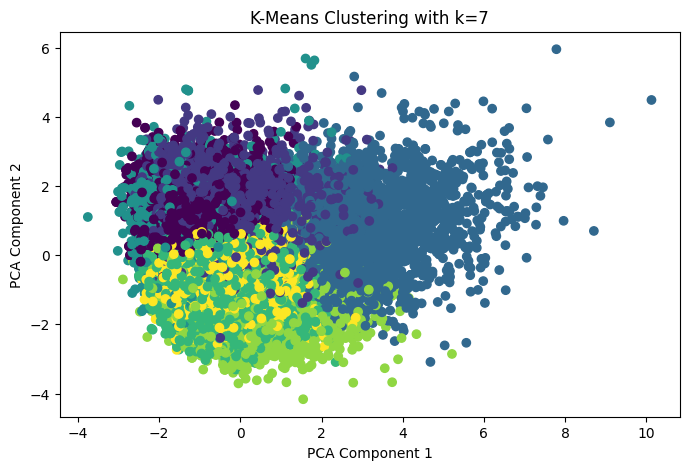

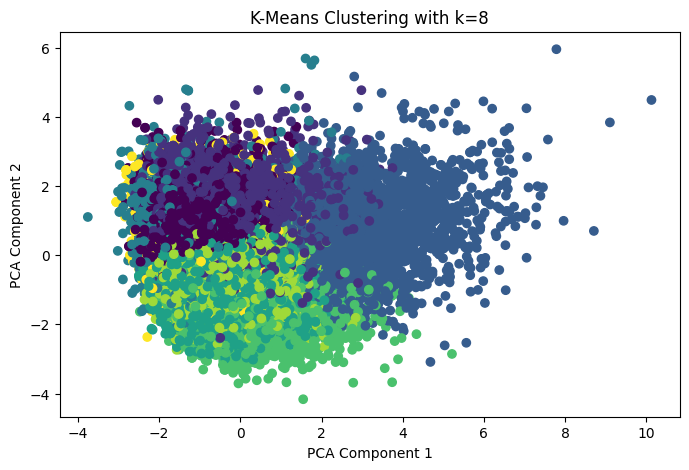

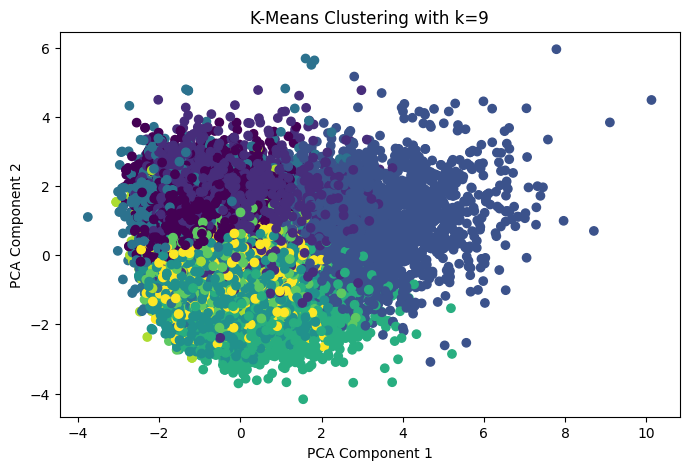

In [7]:
# TODO: Write your code here
for k in range(2, 10):
    kmeans = KMeansScratch(n_clusters=k)
    kmeans.fit(pca_data)
    labels = kmeans.predict(pca_data)

    plt.figure(figsize=(8, 5))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()


The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

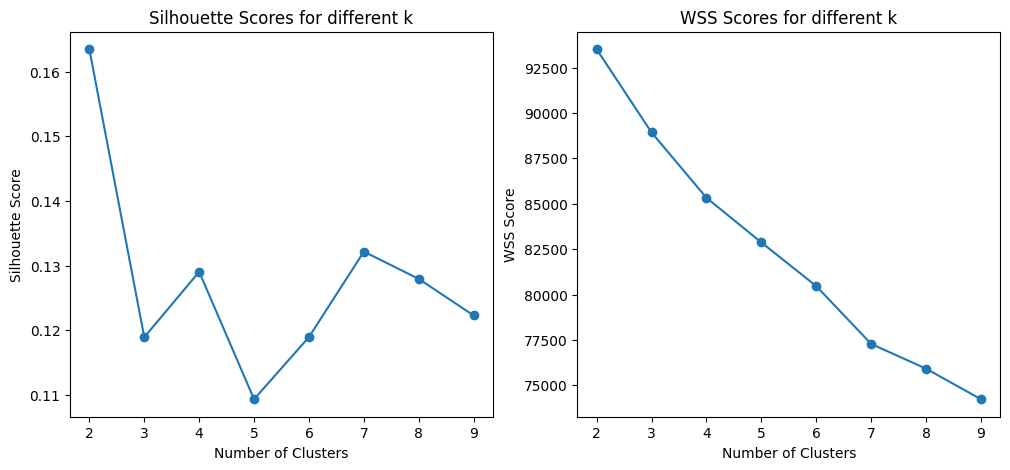

The optimal number of clusters (k) is 2


In [8]:
# TODO: Write your code here
sil_scores = []
wss_scores = []

for k in range(2, 10):
    kmeans = KMeansScratch(n_clusters=k)
    kmeans.fit(pca_data)
    labels = kmeans.predict(pca_data)

    # Calculate Silhouette Score
    sil_score = silhouette_score(pca_data, labels)
    sil_scores.append(sil_score)

    # Calculate WSS Score
    wss = sum(np.min(np.linalg.norm(pca_data[:, np.newaxis] - kmeans.centers, axis=2), axis=1))
    wss_scores.append(wss)

# Plot Silhouette Scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k')

# Plot WSS Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), wss_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Score')
plt.title('WSS Scores for different k')
plt.show()

# Determine optimal k based on highest silhouette score and elbow point in WSS
optimal_k = range(2, 10)[np.argmax(sil_scores)]
print(f"The optimal number of clusters (k) is {optimal_k}")


# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [9]:
# TODO: Write your code here
def sample_check(kmeans, data, n_samples=2):
    labels = kmeans.predict(data)
    for cluster in range(kmeans.n_clusters):
        cluster_data = data[labels == cluster]
        samples = cluster_data[np.random.choice(cluster_data.shape[0], n_samples, replace=False)]
        print(f"Cluster {cluster}:")
        for sample in samples:
            print(sample)
        print("\n")

# Example with optimal k
kmeans = KMeansScratch(n_clusters=optimal_k)
kmeans.fit(pca_data)
sample_check(kmeans, pca_data)


Cluster 0:
[-1.79217286 -0.24991071  0.39932152  1.91579434 -2.51019268  2.03061101
  0.34702207 -1.44962213 -0.05097349]
[-2.0886047  -0.30289486  1.09191109 -0.415647   -0.01015364 -0.72388717
  0.28499664 -0.31609069 -0.25528143]


Cluster 1:
[ 1.29124407  2.08048143  0.3493889  -0.70995417 -0.0471553   1.00565812
  1.74691703 -1.00657178  0.41878133]
[ 2.04314505 -0.08167164  0.7093227  -0.35947168  0.1444644  -1.04870101
  0.77853694 -0.65368293 -0.13396593]




Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

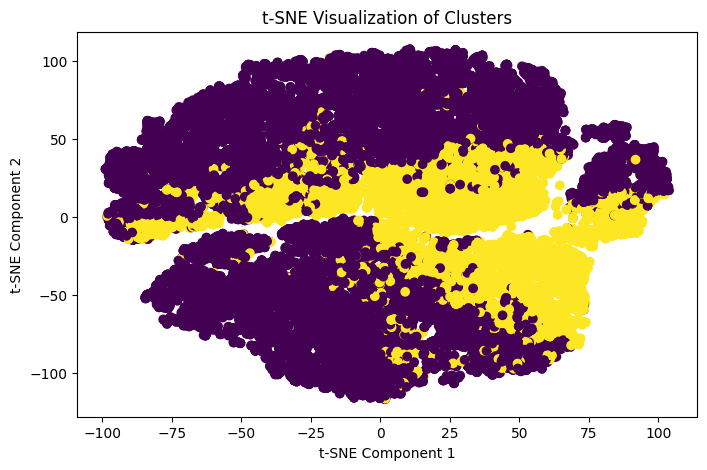

In [10]:
# TODO: Write your code here
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(pca_data)

plt.figure(figsize=(8, 5))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans.predict(pca_data), cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
